### Singapore AirBnB

The dataset consists of information on AirBnB reservations in Singapore. The original data set can be downloaded in [Inside Airbnb](http://insideairbnb.com/get-the-data.html) website and the data set used in this project is a cleaned version downloaded from [Kaggle.com](https://www.kaggle.com/jojoker/singapore-airbnb). 

This project analyzes the Singapore Airbnb listings dataset using Python, Pandas, and Folium to gain insights into listing and host behavior. The analysis focuses on data cleaning, aggregation, filtering, and feature engineering using Pandas, along with interactive geospatial visualizations to explore pricing and availability patterns across neighborhoods.

The code emphasizes clarity, reproducibility, and best practices, reflecting how data analysis is performed in a professional setting.


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium import plugins
from folium.plugins import HeatMap

In [2]:
# Import data
data = pd.read_csv('listings.csv')

In [3]:
# First five columns of the dataset
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


In [4]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
# View unique room types
data.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [6]:
# Number of Unique facilities
data.name.nunique()

7457

In [7]:
# Number of unique ids
data.id.nunique()

7907

In [8]:
# Number of hosts
data.host_name.nunique()

1833

In [9]:
# Dimensions of the dataset
data.shape

(7907, 16)

The data set consists of 7907 AirBnB reservations and 16 attributes on each reservation. 

In [10]:
# Column names of the dataset
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [11]:
# Data type of each column
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [12]:
# Descriptive statistics
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7.907000e+03,7.907000e+03,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,5149.000000,7907.000000,7907.000000
mean,2.338862e+07,9.114481e+07,1.314192,103.848787,169.332996,17.510054,12.807386,1.043669,40.607689,208.726318
std,1.016416e+07,8.190910e+07,0.030577,0.043675,340.187599,42.094616,29.707746,1.285851,65.135253,146.120034
min,4.909100e+04,2.366600e+04,1.243870,103.646560,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.582180e+07,2.305808e+07,1.295795,103.835825,65.000000,1.000000,0.000000,0.180000,2.000000,54.000000
50%,2.470627e+07,6.344891e+07,1.311030,103.849410,124.000000,3.000000,2.000000,0.550000,9.000000,260.000000
75%,3.234850e+07,1.553811e+08,1.322110,103.872535,199.000000,10.000000,10.000000,1.370000,48.000000,355.000000
max,3.811276e+07,2.885676e+08,1.454590,103.973420,10000.000000,1000.000000,323.000000,13.000000,274.000000,365.000000


The descriptive statistics are calculated only for the numerical attributes. 

In [13]:
# Null values in the dataset per column
data.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [14]:
# Maximum and minimum prices of AirBnBs
print('minimum:',data.price.min(),'maximum:',data.price.max())

minimum: 0 maximum: 10000


The maximum price of the reservations is 10000, while the 75th percentile is only 199 (from the descriptive statistics table). 

In [15]:
# Number of neighborhood groups
data.neighbourhood_group.nunique()

5

In [16]:
# Group data according to the neighborhood group
df= data.groupby(data['neighbourhood_group'],as_index=False).sum()
df

,neighbourhood_group,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Central Region,152172738363,Pleasant Room along Bukit TimahConveniently lo...,584677940279,SujathaK2 GuesthouseK2 GuesthouseElizabethK2 G...,Bukit TimahBukit MerahBukit MerahNewtonBukit M...,8224.60417,655195.88995,Private roomPrivate roomPrivate roomPrivate ro...,1114355,96798,82255,2014-12-262019-04-212018-09-132019-08-222019-0...,4471.81,298442,1359184
1,East Region,9641046574,Ensuite Room (Room 1 & 2) near EXPOB&B Room 1...,40468531122,BelindaBelindaBelindaBelindaBiancaBiancaBianca...,TampinesTampinesTampinesTampinesBedokBedokBedo...,675.67165,52796.43309,Private roomPrivate roomPrivate roomPrivate ro...,72392,13026,9562,2019-08-112019-07-282019-08-152019-07-252019-0...,376.73,6224,88359
2,North Region,4584664393,COZICOMFORT LONG TERM STAY ROOM 2COZICOMFORTro...,17727329530,FrancescaFrancescaZhoulinAmmarudinTeng YanFoon...,WoodlandsWoodlandsSembawangWoodlandsCentral Wa...,289.55189,21178.02567,Private roomPrivate roomPrivate roomPrivate ro...,22599,5899,1910,2013-10-212015-10-012014-03-082014-07-142018-0...,115.81,3045,43622
3,North-East Region,6923203606,Homestay at SerangoonCosy Furnished bedroomCom...,28773566486,ShirlnetChristianaImmellymelFFJillJoyceNateshF...,SerangoonSerangoonPunggolHougangHougangSerango...,475.70932,35942.43077,Private roomPrivate roomPrivate roomPrivate ro...,34544,10979,4157,2018-01-312017-07-192017-06-132019-08-152019-0...,212.48,1062,57954
4,West Region,11612202010,Comfortable Condo Room - Boon Lay MRTS$950/mth...,49034624737,LenaSarahSereneSkyeSkyeSam & JennyTraceySam & ...,Jurong WestBukit PanjangBukit BatokChoa Chu Ka...,725.78279,56019.58295,Private roomPrivate roomPrivate roomPrivate ro...,95026,11750,3384,2019-08-112019-06-012015-03-152018-11-182019-0...,197.02,12312,101280


In [17]:
df['neighbourhood_group'].values

array(['Central Region', 'East Region', 'North Region',
       'North-East Region', 'West Region'], dtype=object)

A correlation matrix would be an ideal tool to get insights on the features affect on the price most and least. Before plotting the correlation matrix, some data should be dropped from the table and some features should be transformed.

<Axes: xlabel='neighbourhood_group', ylabel='calculated_host_listings_count'>

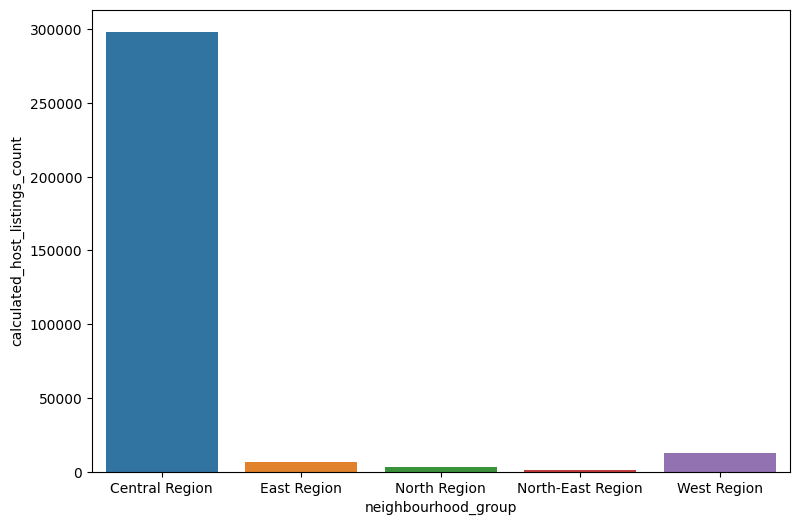

In [18]:
# Number of host listings in each neighborhood group
plt.figure(figsize=(9,6))
sns.barplot(x='neighbourhood_group', y='calculated_host_listings_count', data= df)

The central region of Singapore has significantly high AirBnB listings. Central region should be the busiest area in Singapore.

<Axes: xlabel='neighbourhood_group', ylabel='price'>

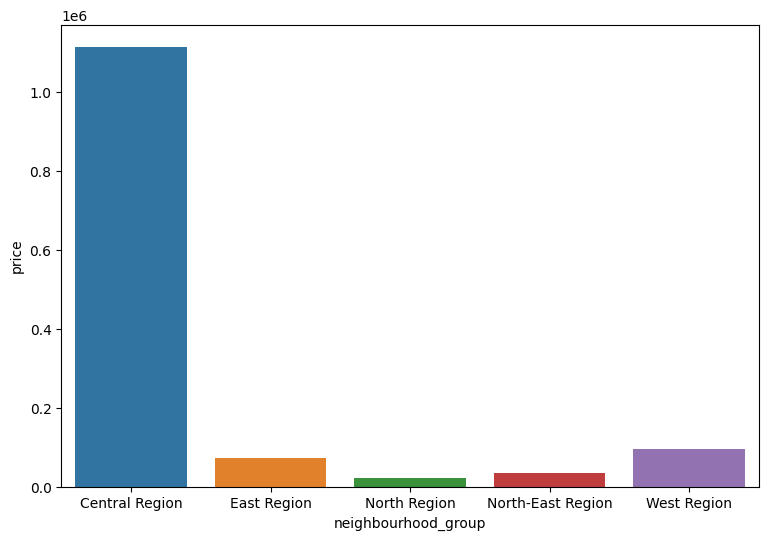

In [19]:
# Total money spent for AirBnb in different neighborhood regions
plt.figure(figsize=(9,6))
sns.barplot(x='neighbourhood_group', y='price', data= df)

Again, the AirBnB facilities in the central region have received a significantly high revenue, which is consistent with the previous plot.

Data can be plotted using a scatterplot.

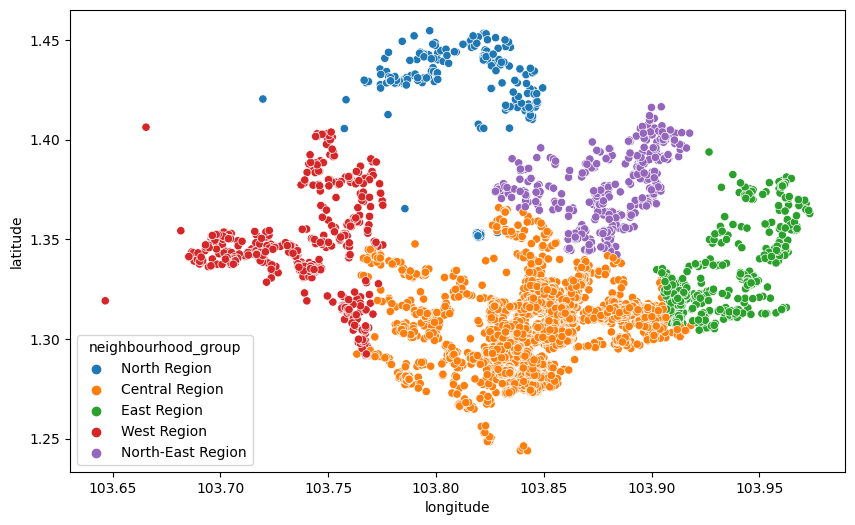

In [20]:
# Plot location data in a scatterplot, color according to the neighborhood group
plt.figure(figsize=(10,6))
sns.scatterplot(data= data, x= 'longitude', y= 'latitude', hue='neighbourhood_group')
plt.show()

This visualization shows how dense the AirBnB facilies in the central region. All four other areas have lesser number of AirBnb facilites.

### Plot data in a map

Folium is a frequently used library to visualize data in interactive maps. Plotting all the points of this data set takes a long time due to the limited performance of the computer. Therefore, a random sample of data is plotted in the first map. Only the selected data will be plotted after each analysis in this project. 

The location data can be plotted on interactive maps using Folium library. A heatmap shows the desnity of the AirBnB facilities more conviniently.

GitHub is not able to visualize the maps created by Folium. You can copy and paste the **link to this project from the address bar** in [nbviewer.org](https://nbviewer.org/) to visulize the interactive maps. Two screenshots are added for quick reference. 

In [21]:
# Create a longitude latitude lists to plot in a map
a= data.latitude.values
b= data.longitude.values

# Create zip objects of latitude and longitude value pairs
latlon = zip(a,b)
latlon = list(latlon)

# select a random subset of 75 locations to reduce plotting time
from random import sample
latlon = sample(latlon,75)

In [22]:
# Create a map object provide a location in the area of interest
mapit = folium.Map( location=[1.33235, 103.78521], zoom_start=6 )
# Draw the randomly selected subset of points on the map
for coord in latlon:
    folium.Marker( location=[ coord[0], coord[1] ], fill_color='#43d9de', radius=8 ).add_to( mapit )

mapit

![Location_map.png](Location_map.png)

In [23]:
# Create a folium object with a different map time
m = folium.Map(location=[1.33235, 103.78521], tiles='CartoDB Positron', zoom_start=6)

# Create a heatmap using the data subset
HeatMap(latlon).add_to(m)
m

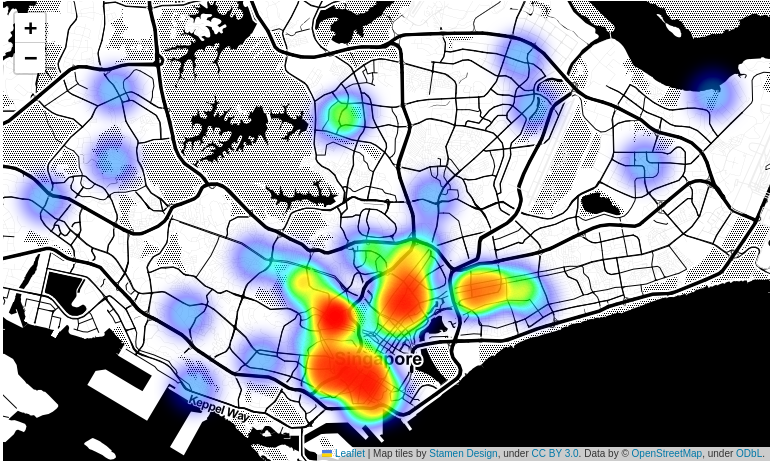

#### Data Analysis with Pandas

Explore the data set and answer the questions below.

1. What is the average price of an AirBnB in each neighborhood_group?

In [24]:
# Group initial dataframe based on neighborhood and calculate mean for each group
data.groupby('neighbourhood_group')['price'].mean()

neighbourhood_group
Central Region       176.629418
East Region          142.503937
North Region         110.779412
North-East Region     99.838150
West Region          175.974074
Name: price, dtype: float64

2. What is the neighborhood group with highest number of neighborhoods? Rank the neighborhood groups according to the decreasing order.

In [25]:
# Group AirBnBs by neighborhood group, count unique neighborhood names in each group
data.groupby('neighbourhood_group', as_index=False)['neighbourhood'].nunique()

,neighbourhood_group,neighbourhood
0,Central Region,20
1,East Region,3
2,North Region,7
3,North-East Region,5
4,West Region,8


3. What is the name of the host who has the most AirBnB listings?

In [26]:
# Are there any duplicate listings in the data set
data['id'].duplicated().any()

False

In [27]:
max_listings_host_id = data.groupby('host_id')['id'].count().idxmax()
data.loc[data['host_id'] == max_listings_host_id, 'host_name'].iloc[0]

'Jay'

4. List five hosts with the most number of AirBnB listings in the city.

In [28]:
top5_hosts = data.groupby('host_id')['id'].count().sort_values(ascending= False).head(5)
top5_host_ids = top5_hosts.index
data.loc[data['host_id'].isin(top5_host_ids), ['host_id', 'host_name']].drop_duplicates()

,host_id,host_name
165,8492007,Alvin
644,31464513,Darcy
887,29420853,Aaron
2038,66406177,Jay
4545,209913841,Richards


5. How many hosts own AirBnB listings in more than one neighborhood?

In [29]:
# Group data by host id and get unique neighborhood group for each host id
listings_grouped = data.groupby('host_id')['neighbourhood'].count()
num_hosts_multiple_listings = listings_grouped[listings_grouped > 1].count()
num_hosts_multiple_listings

740

6. Find the geographic center of each neighborhood group.

In [30]:
# Group AirBnBs according to neighborhood group, calculate the longitudes and latitudes of geographic means 
geographic_mean_df = data.groupby('neighbourhood_group', as_index=False)[['latitude', 'longitude']].mean()
geographic_mean_df

,neighbourhood_group,latitude,longitude
0,Central Region,1.303630,103.850989
1,East Region,1.330062,103.929986
2,North Region,1.419372,103.813851
3,North-East Region,1.374882,103.879858
4,West Region,1.344042,103.739968


In [31]:
# Create a longitude latitude lists to plot in a map
a= geographic_mean_df.latitude.values
b= geographic_mean_df.longitude.values

# Create zip objects of latitude and longitude value pairs
latlon = zip(a,b)
latlon = list(latlon)

# Create a map object provide a location in the area of interest
mapit = folium.Map( location=[1.33235, 103.78521], zoom_start=6 )
# Draw the geographic mean points on the map
for coord in latlon:
    folium.Marker( location=[ coord[0], coord[1] ], fill_color='#43d9de', radius=8 ).add_to( mapit )

# Add a heatmap of each neighborhood group using the data subset
HeatMap(latlon).add_to(mapit) 
    
mapit

Below is a screenshot of the plotted geographic centers with Heatmap.

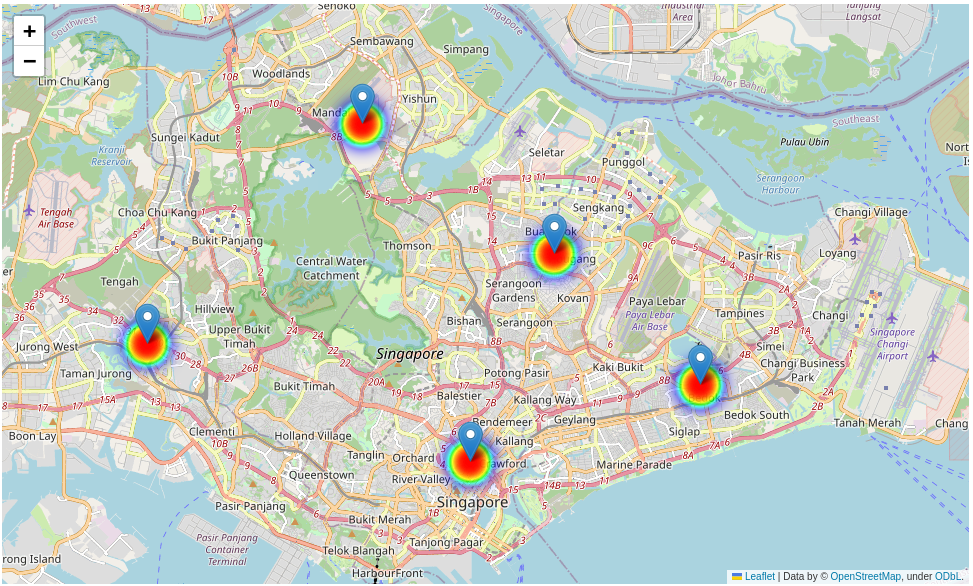

7. Who is the owner of the facility with highest price?

In [32]:
# Find the maximum price and return the host names with highest prices
data.loc[data['price']== data['price'].max(), ['host_name', 'price']]


,host_name,price
2392,Yolivia,10000
2978,Jj,10000
5823,David,10000


8. What is the region with the highest chance of reserving an AirBnB at any time of the year?

In [33]:
# Area with the highest mean availability
mean_availability_by_group= data.groupby('neighbourhood_group')['availability_365'].mean()
mean_availability_by_group.idxmax()

'Central Region'

Central region has the highest mean availability. Mean availability of the North region is very close to the central region.

9. Convert last_review to a datetime and extract:

- year

- month

In [34]:
data['last_review'].isna().sum()

2758

In [35]:
data['last_review'] = pd.to_datetime(data['last_review'])
data['year'] = data['last_review'].dt.year.fillna(0).astype(int)
data['month'] = data['last_review'].dt.month.fillna(0).astype(int)
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365,2013,10
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365,2014,12
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365,2015,10
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353,2019,8
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355,2019,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7902,38105126,Loft 2 pax near Haw Par / Pasir Panjang. Free ...,278109833,Belle,Central Region,Queenstown,1.27973,103.78751,Entire home/apt,100,3,0,NaT,NaN,31,61,0,0
7903,38108273,3bedroom luxury at Orchard,238891646,Neha,Central Region,Tanglin,1.29269,103.82623,Entire home/apt,550,6,0,NaT,NaN,34,365,0,0
7904,38109336,[ Farrer Park ] New City Fringe CBD Mins to MRT,281448565,Mindy,Central Region,Kallang,1.31286,103.85996,Private room,58,30,0,NaT,NaN,3,173,0,0
7905,38110493,Cheap Master Room in Central of Singapore,243835202,Huang,Central Region,River Valley,1.29543,103.83801,Private room,56,14,0,NaT,NaN,2,30,0,0


10. Find listings with price = 0. How many are there? Remove them safely.

In [36]:
data[data['price'] == 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month
3168,21408571,1 BR @ Little India & Farrer Park MRT,114674497,Mitul,Central Region,Rochor,1.30954,103.85271,Entire home/apt,0,3,9,2019-08-11,0.51,6,351,2019,8


There is only one listing with price = 0.

In [37]:
data = data[data['price'] != 0]
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365,2013,10
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365,2014,12
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365,2015,10
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353,2019,8
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355,2019,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7902,38105126,Loft 2 pax near Haw Par / Pasir Panjang. Free ...,278109833,Belle,Central Region,Queenstown,1.27973,103.78751,Entire home/apt,100,3,0,NaT,NaN,31,61,0,0
7903,38108273,3bedroom luxury at Orchard,238891646,Neha,Central Region,Tanglin,1.29269,103.82623,Entire home/apt,550,6,0,NaT,NaN,34,365,0,0
7904,38109336,[ Farrer Park ] New City Fringe CBD Mins to MRT,281448565,Mindy,Central Region,Kallang,1.31286,103.85996,Private room,58,30,0,NaT,NaN,3,173,0,0
7905,38110493,Cheap Master Room in Central of Singapore,243835202,Huang,Central Region,River Valley,1.29543,103.83801,Private room,56,14,0,NaT,NaN,2,30,0,0


11. Detect duplicate listings based on id. Are there any?

In [38]:
data['id'].duplicated().any()

False

There is no duplicated listings.

12. Get listings that:

- have more than 50 reviews

- AND price below the city median

In [44]:
median_price = data['price'].median()
data.loc[(data['number_of_reviews']> 50) & (data['price'] < median_price), 'id']

7         241503
8         241508
9         241510
13        294281
19        369141
          ...   
4198    26056791
4237    26232923
4347    26885359
4585    27992861
4655    28211070
Name: id, Length: 336, dtype: int64